**Assingnment- 2**

**Aimal Dastagirzada**


**Student ID-220088928**



In [1684]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore
from scipy.stats import skew, kurtosis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import random
random.seed(42)

In [1685]:
df = pd.read_csv('/Users/aimaldastagirzada/Downloads/Customer_Data.csv')

In [1686]:
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES   
0     C10001    40.900749           0.818182      95.40              0.00  \
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY   
0                      95.40      0.000000             0.166667  \
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY   
0                       0.000000                          0.083333  \
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT   
0                   0.000000                 0              2        1000.0  \
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

**Data Preprocessing**

In [1687]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [1688]:
df.describe(include='all').T

count unique     top freq         mean   
CUST_ID                             8950   8950  C10001    1          NaN  \
BALANCE                           8950.0    NaN     NaN  NaN  1564.474828   
BALANCE_FREQUENCY                 8950.0    NaN     NaN  NaN     0.877271   
PURCHASES                         8950.0    NaN     NaN  NaN  1003.204834   
ONEOFF_PURCHASES                  8950.0    NaN     NaN  NaN   592.437371   
INSTALLMENTS_PURCHASES            8950.0    NaN     NaN  NaN   411.067645   
CASH_ADVANCE                      8950.0    NaN     NaN  NaN   978.871112   
PURCHASES_FREQUENCY               8950.0    NaN     NaN  NaN     0.490351   
ONEOFF_PURCHASES_FREQUENCY        8950.0    NaN     NaN  NaN     0.202458   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0    NaN     NaN  NaN     0.364437   
CASH_ADVANCE_FREQUENCY            8950.0    NaN     NaN  NaN     0.135144   
CASH_ADVANCE_TRX                  8950.0    NaN     NaN  NaN     3.248827   
PURCHASES_TRX                     8950.0    NaN     NaN  NaN    14.709832   
CREDIT_LIMIT                      8949.0    NaN     NaN  NaN   4494.44945   
PAYMENTS                          8950.0    NaN     NaN  NaN  1733.143852   
MINIMUM_PAYMENTS                  8637.0    NaN     NaN  NaN   864.206542   
PRC_FULL_PAYMENT                  8950.0    NaN     NaN  NaN     0.153715   
TENURE                            8950.0    NaN     NaN  NaN    11.517318   

                                          std       min         25%   
CUST_ID                                   NaN       NaN         NaN  \
BALANCE                           2081.531879       0.0  128.281915   
BALANCE_FREQUENCY                    0.236904       0.0    0.888889   
PURCHASES                         2136.634782       0.0      39.635   
ONEOFF_PURCHASES                  1659.887917       0.0         0.0   
INSTALLMENTS_PURCHASES             904.338115       0.0         0.0   
CASH_ADVANCE                      2097.163877       0.0         0.0   
PURCHASES_FREQUENCY                  0.401371       0.0    0.083333   
ONEOFF_PURCHASES_FREQUENCY           0.298336       0.0         0.0   
PURCHASES_INSTALLMENTS_FREQUENCY     0.397448       0.0         0.0   
CASH_ADVANCE_FREQUENCY               0.200121       0.0         0.0   
CASH_ADVANCE_TRX                     6.824647       0.0         0.0   
PURCHASES_TRX                       24.857649       0.0         1.0   
CREDIT_LIMIT                      3638.815725      50.0      1600.0   
PAYMENTS                          2895.063757       0.0  383.276166   
MINIMUM_PAYMENTS                  2372.446607  0.019163  169.123707   
PRC_FULL_PAYMENT                     0.292499       0.0         0.0   
TENURE                               1.338331       6.0        12.0   

                                         50%          75%          max  
CUST_ID                                  NaN          NaN          NaN  
BALANCE                           873.385231  2054.140036  19043.13856  
BALANCE_FREQUENCY                        1.0          1.0          1.0  
PURCHASES                             361.28      1110.13     49039.57  
ONEOFF_PURCHASES                        38.0      577.405     40761.25  
INSTALLMENTS_PURCHASES                  89.0     468.6375      22500.0  
CASH_ADVANCE                             0.0  1113.821139  47137.21176  
PURCHASES_FREQUENCY                      0.5     0.916667          1.0  
ONEOFF_PURCHASES_FREQUENCY          0.083333          0.3          1.0  
PURCHASES_INSTALLMENTS_FREQUENCY    0.166667         0.75          1.0  
CASH_ADVANCE_FREQUENCY                   0.0     0.222222          1.5  
CASH_ADVANCE_TRX                         0.0          4.0        123.0  
PURCHASES_TRX                            7.0         17.0        358.0  
CREDIT_LIMIT                          3000.0       6500.0      30000.0  
PAYMENTS                          856.901546  1901.134317  50721.48336  
MINIMUM_PAYMENTS                  312.343947   825.48

In [1689]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

**Removing missing values**


In [1690]:
# Since we have continues varible with missing data we will plot them and then based on the result we can decide if we should use mean or median for replacing the missing values with.

df.drop(df[df['CREDIT_LIMIT'].isnull()].index, inplace=True)

df['MINIMUM_PAYMENTS'].plot.hist(bins=20)



<Axes: ylabel='Frequency'>

In [1691]:
#Since our data is not normally disturbuted in MINIMUM_PAYMENTS we will replace the missing values with the median as it is a robust measure of central tendency that is not affected by extreme values.
median_value = df['MINIMUM_PAYMENTS'].median()

df['MINIMUM_PAYMENTS'].fillna(median_value, inplace=True)

In [1692]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8949 non-null   object 
 1   BALANCE                           8949 non-null   float64
 2   BALANCE_FREQUENCY                 8949 non-null   float64
 3   PURCHASES                         8949 non-null   float64
 4   ONEOFF_PURCHASES                  8949 non-null   float64
 5   INSTALLMENTS_PURCHASES            8949 non-null   float64
 6   CASH_ADVANCE                      8949 non-null   float64
 7   PURCHASES_FREQUENCY               8949 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 11  CASH_ADVANCE_TRX                  8949 non-null   int64  
 12  PURCHASES_T

**Removing Outliers**

In [1693]:
import seaborn as sns

In [1694]:
Num_column = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

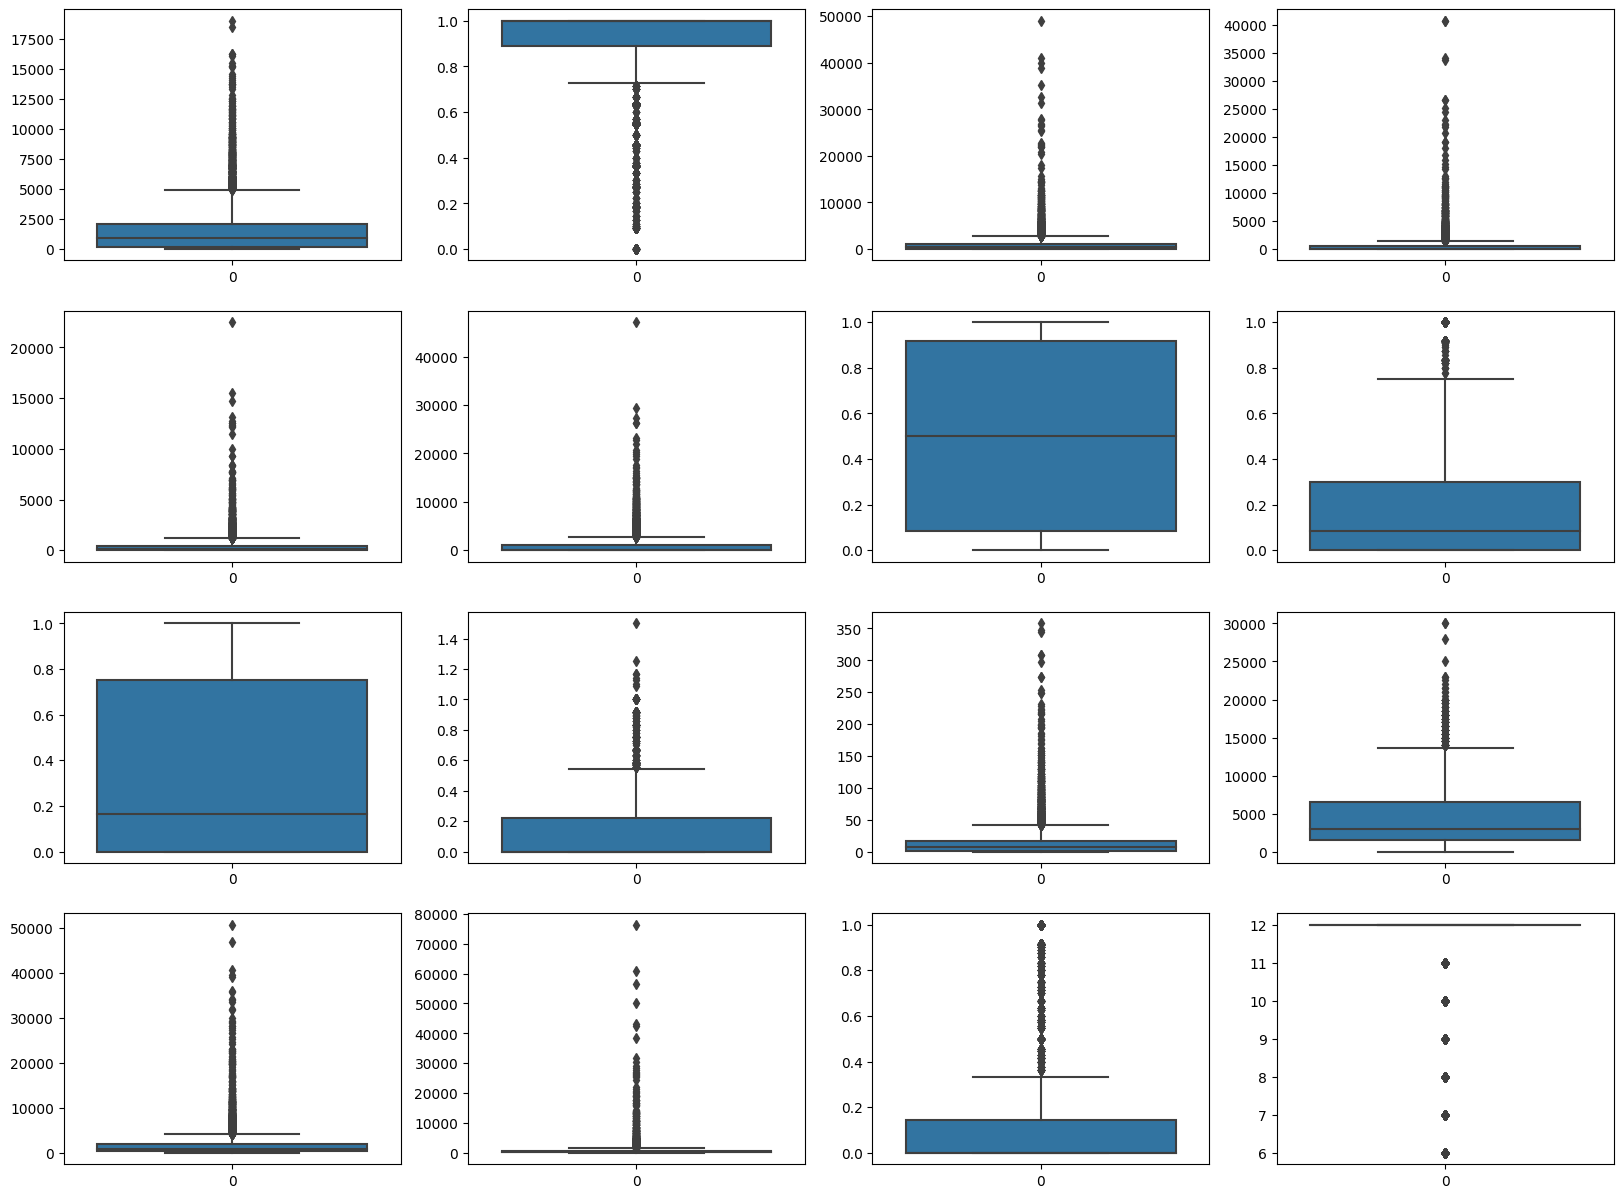

In [1695]:
# Checking for any outliers
fig, axs=plt.subplots(4,4, figsize=(20,15))
plt1= sns.boxplot(df['BALANCE'], ax=axs[0][0])
plt2= sns.boxplot(df['BALANCE_FREQUENCY'], ax=axs[0][1])
plt3=sns.boxplot(df['PURCHASES'], ax=axs[0][2])
plt4=sns.boxplot(df['ONEOFF_PURCHASES'], ax=axs[0][3])
plt5=sns.boxplot(df['INSTALLMENTS_PURCHASES'], ax=axs[1][0])
plt6=sns.boxplot(df['CASH_ADVANCE'], ax=axs[1][1])
plt7=sns.boxplot(df['PURCHASES_FREQUENCY'],ax=axs[1][2])
plt8=sns.boxplot(df['ONEOFF_PURCHASES_FREQUENCY'], ax=axs[1][3])
plt9=sns.boxplot(df['PURCHASES_INSTALLMENTS_FREQUENCY'], ax=axs[2][0])
plt10=sns.boxplot(df['CASH_ADVANCE_FREQUENCY'], ax=axs[2][1])
plt10=sns.boxplot(df['PURCHASES_TRX'], ax=axs[2][2])
plt10=sns.boxplot(df['CREDIT_LIMIT'], ax=axs[2][3])
plt10=sns.boxplot(df['PAYMENTS'], ax=axs[3][0])
plt10=sns.boxplot(df['MINIMUM_PAYMENTS'], ax=axs[3][1])
plt11=sns.boxplot(df['PRC_FULL_PAYMENT'], ax=axs[3][2])
plt11=sns.boxplot(df['TENURE'], ax=axs[3][3])


In [1696]:
for column in Num_column:
    skewness_values = []
    s = skew(df[column])
    k = kurtosis(df[column])
    print(f'{column}: skewness = {s}, kurtosis= {k}')
    

BALANCE: skewness = 2.39286931104363, kurtosis= 7.669089092457153
BALANCE_FREQUENCY: skewness = -2.023853933829657, kurtosis= 3.0952058031061487
PURCHASES: skewness = 8.14260420160155, kurtosis= 111.3170266701625
ONEOFF_PURCHASES: skewness = 10.042938069144444, kurtosis= 164.07967448656362
INSTALLMENTS_PURCHASES: skewness = 7.297599697990101, kurtosis= 96.51255160068915
CASH_ADVANCE: skewness = 5.165457444186707, kurtosis= 52.86387995303089
PURCHASES_FREQUENCY: skewness = 0.059960065332719345, kurtosis= -1.638365674551192
ONEOFF_PURCHASES_FREQUENCY: skewness = 1.5351955846521053, kurtosis= 1.1600002768226574
PURCHASES_INSTALLMENTS_FREQUENCY: skewness = 0.5089378965346096, kurtosis= -1.3986869029049458
CASH_ADVANCE_FREQUENCY: skewness = 1.8283375947131304, kurtosis= 3.331657585882775
CASH_ADVANCE_TRX: skewness = 5.720017350694568, kurtosis= 61.60526288820158
PURCHASES_TRX: skewness = 4.629717044068625, kurtosis= 34.77049307409807
CREDIT_LIMIT: skewness = 1.522208803328015, kurtosis= 2.8

In [1697]:
df2 = df.copy()

In [1698]:
if abs(s) > 1:
    df2[column] = df2[column].apply(lambda x: np.log(x + 1))
z_scores = zscore(df2[Num_column])
threshold = 4.5
df2 = df2[(np.abs(z_scores) < threshold).all(axis=1)]

In [1699]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8566 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8566 non-null   object 
 1   BALANCE                           8566 non-null   float64
 2   BALANCE_FREQUENCY                 8566 non-null   float64
 3   PURCHASES                         8566 non-null   float64
 4   ONEOFF_PURCHASES                  8566 non-null   float64
 5   INSTALLMENTS_PURCHASES            8566 non-null   float64
 6   CASH_ADVANCE                      8566 non-null   float64
 7   PURCHASES_FREQUENCY               8566 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8566 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8566 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8566 non-null   float64
 11  CASH_ADVANCE_TRX                  8566 non-null   int64  
 12  PURCHASES_T

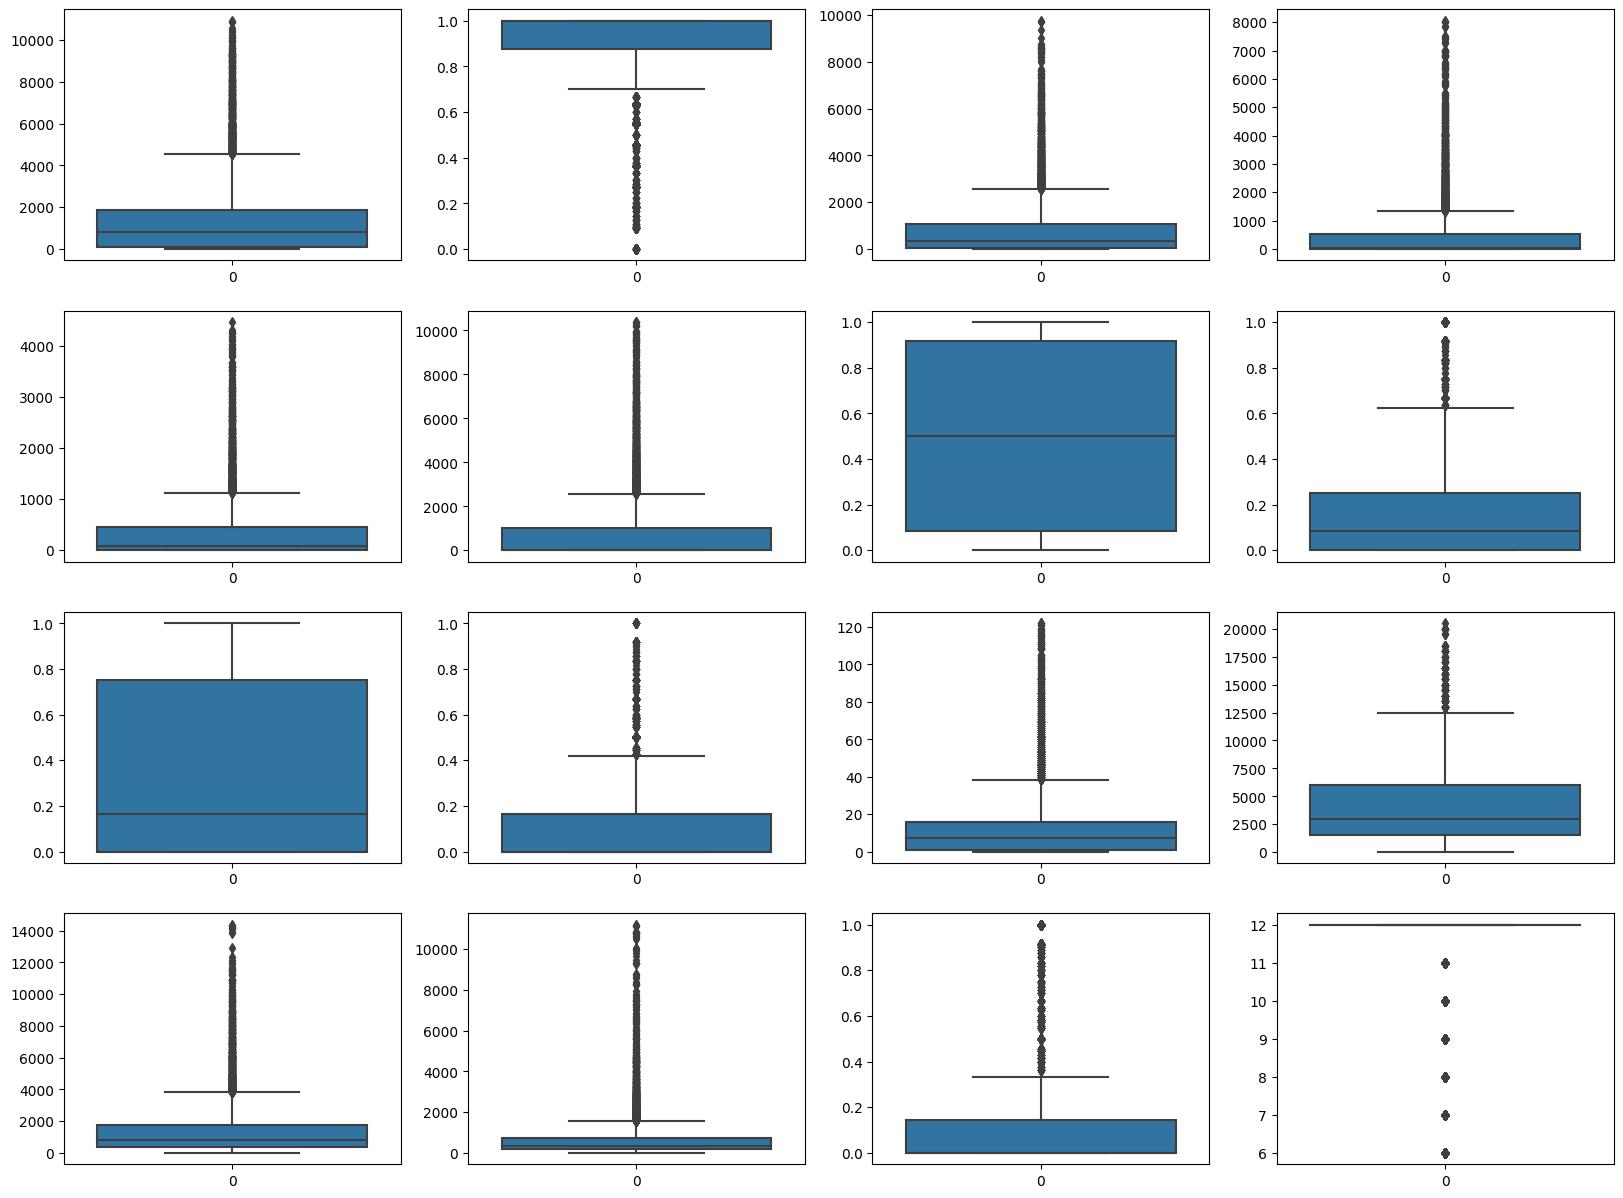

In [1700]:
fig, axs=plt.subplots(4,4, figsize=(20,15))
plt1= sns.boxplot(df2['BALANCE'], ax=axs[0][0])
plt2= sns.boxplot(df2['BALANCE_FREQUENCY'], ax=axs[0][1])
plt3=sns.boxplot(df2['PURCHASES'], ax=axs[0][2])
plt4=sns.boxplot(df2['ONEOFF_PURCHASES'], ax=axs[0][3])
plt5=sns.boxplot(df2['INSTALLMENTS_PURCHASES'], ax=axs[1][0])
plt6=sns.boxplot(df2['CASH_ADVANCE'], ax=axs[1][1])
plt7=sns.boxplot(df2['PURCHASES_FREQUENCY'],ax=axs[1][2])
plt8=sns.boxplot(df2['ONEOFF_PURCHASES_FREQUENCY'], ax=axs[1][3])
plt9=sns.boxplot(df2['PURCHASES_INSTALLMENTS_FREQUENCY'], ax=axs[2][0])
plt10=sns.boxplot(df2['CASH_ADVANCE_FREQUENCY'], ax=axs[2][1])
plt10=sns.boxplot(df2['PURCHASES_TRX'], ax=axs[2][2])
plt10=sns.boxplot(df2['CREDIT_LIMIT'], ax=axs[2][3])
plt10=sns.boxplot(df2['PAYMENTS'], ax=axs[3][0])
plt10=sns.boxplot(df2['MINIMUM_PAYMENTS'], ax=axs[3][1])
plt11=sns.boxplot(df2['PRC_FULL_PAYMENT'], ax=axs[3][2])
plt11=sns.boxplot(df['TENURE'], ax=axs[3][3])

In [1701]:
##Now we apply the Z-score to the acutal dataframe

if abs(s) > 1:
    df[column] = df[column].apply(lambda x: np.log(x + 1))
z_scores = zscore(df[Num_column])
threshold = 4.5
df = df[(np.abs(z_scores) < threshold).all(axis=1)]

In [1702]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8566 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8566 non-null   object 
 1   BALANCE                           8566 non-null   float64
 2   BALANCE_FREQUENCY                 8566 non-null   float64
 3   PURCHASES                         8566 non-null   float64
 4   ONEOFF_PURCHASES                  8566 non-null   float64
 5   INSTALLMENTS_PURCHASES            8566 non-null   float64
 6   CASH_ADVANCE                      8566 non-null   float64
 7   PURCHASES_FREQUENCY               8566 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8566 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8566 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8566 non-null   float64
 11  CASH_ADVANCE_TRX                  8566 non-null   int64  
 12  PURCHASES_T

**EDA**


In [1703]:
fig, axs=plt.subplots(4,4, figsize=(20,15))
plt1= sns.boxplot(df['BALANCE'], ax=axs[0][0])
plt2= sns.boxplot(df['BALANCE_FREQUENCY'], ax=axs[0][1])
plt3=sns.boxplot(df['PURCHASES'], ax=axs[0][2])
plt4=sns.boxplot(df['ONEOFF_PURCHASES'], ax=axs[0][3])
plt5=sns.boxplot(df['INSTALLMENTS_PURCHASES'], ax=axs[1][0])
plt6=sns.boxplot(df['CASH_ADVANCE'], ax=axs[1][1])
plt7=sns.boxplot(df['PURCHASES_FREQUENCY'],ax=axs[1][2])
plt8=sns.boxplot(df['ONEOFF_PURCHASES_FREQUENCY'], ax=axs[1][3])
plt9=sns.boxplot(df['PURCHASES_INSTALLMENTS_FREQUENCY'], ax=axs[2][0])
plt10=sns.boxplot(df['CASH_ADVANCE_FREQUENCY'], ax=axs[2][1])
plt11=sns.boxplot(df['PURCHASES_TRX'], ax=axs[2][2])
plt12=sns.boxplot(df['CREDIT_LIMIT'], ax=axs[2][3])
plt13=sns.boxplot(df['PAYMENTS'], ax=axs[3][0])
plt14=sns.boxplot(df['MINIMUM_PAYMENTS'], ax=axs[3][1])
plt15=sns.boxplot(df['PRC_FULL_PAYMENT'], ax=axs[3][2])
plt16=sns.boxplot(df['TENURE'], ax=axs[3][3])

In [1738]:
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES   
0     C10001    40.900749           0.818182      95.40              0.00  \
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY   
0                      95.40      0.000000             0.166667  \
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY   
0                       0.000000                          0.083333  \
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT   
0                   0.000000                 0              2        1000.0  \
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0      201.802084        139.509787          0.000000  2.564949  
1     4103.032597       1072.340217          0.222222  2.564949  
2      622.066742        627.284787          0.000000  2.564949  
3        0.000000        312.452292          0.000000  2.564949  
4      678.334763        244.791237          0.000000  2.564949  
...           ...               ...               ...       ...  
8945   325.594462      

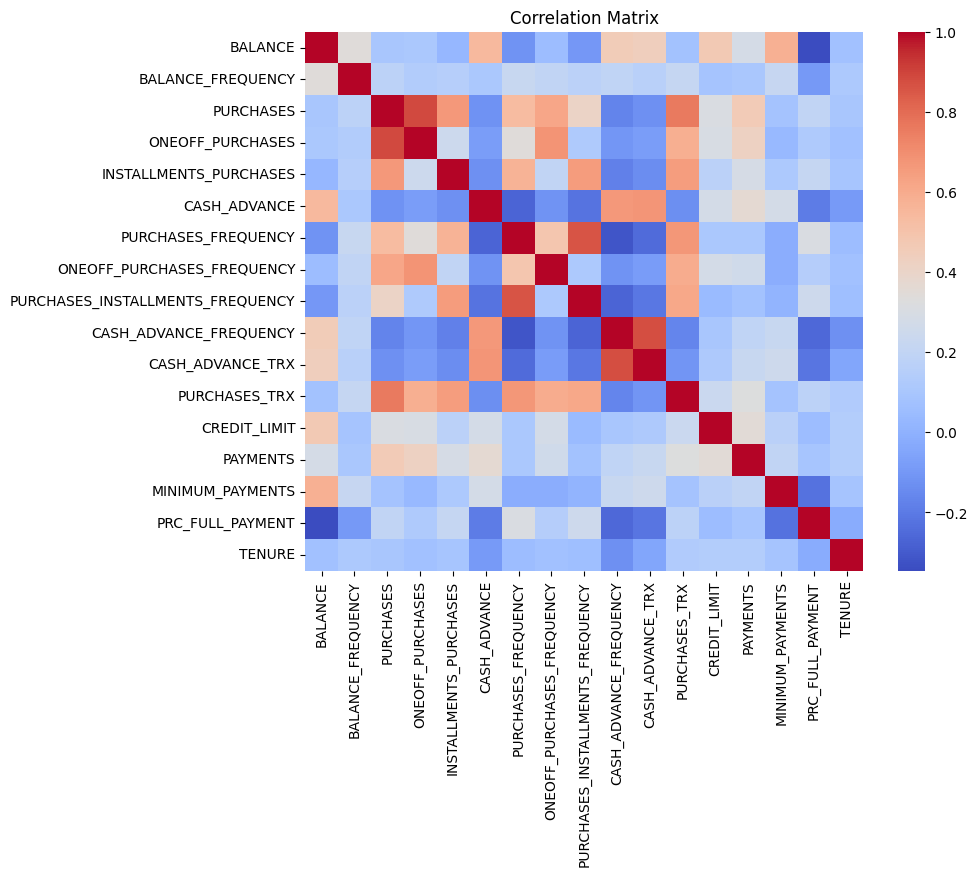

In [1745]:
numeric_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(9, 7))
sns.heatmap(numeric_columns.corr(), cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

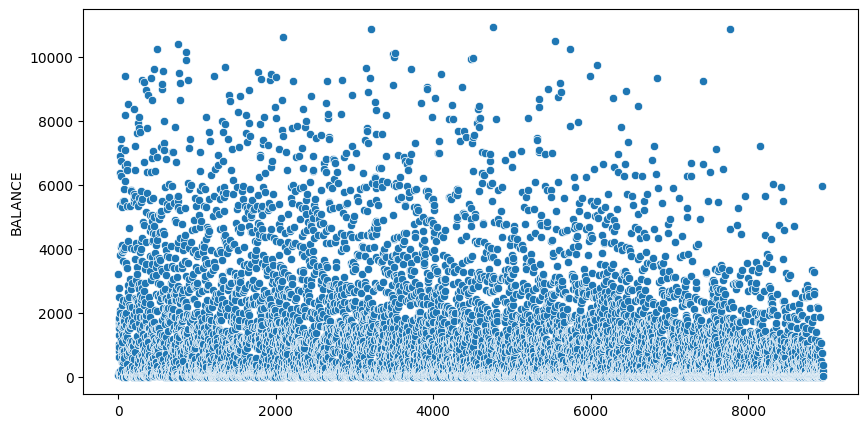

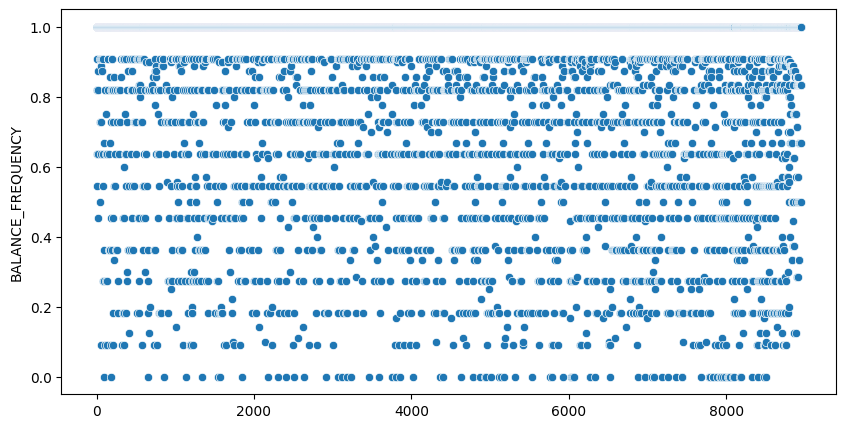

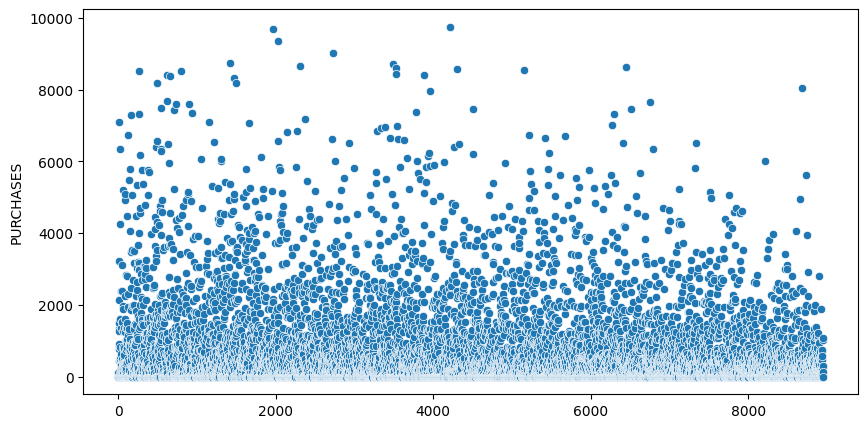

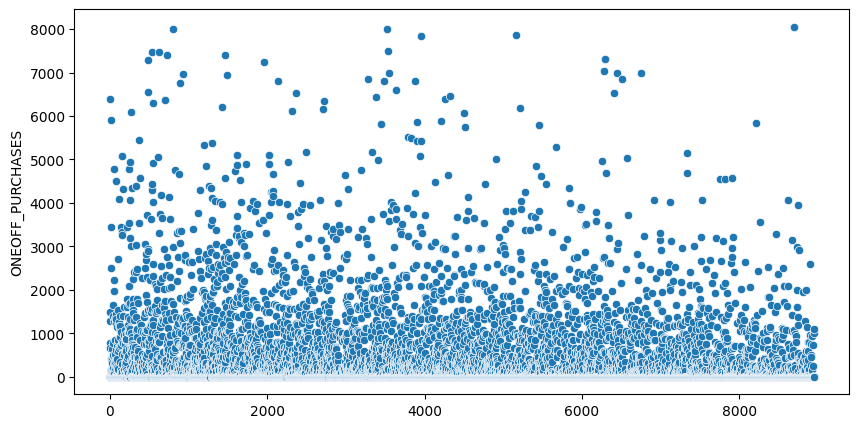

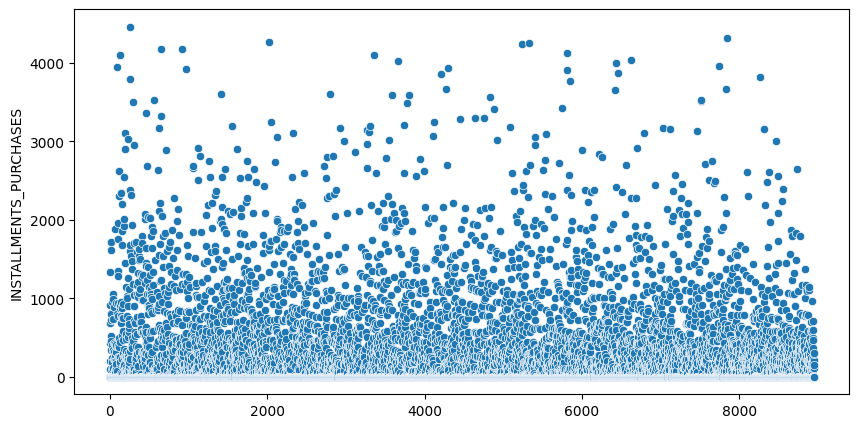

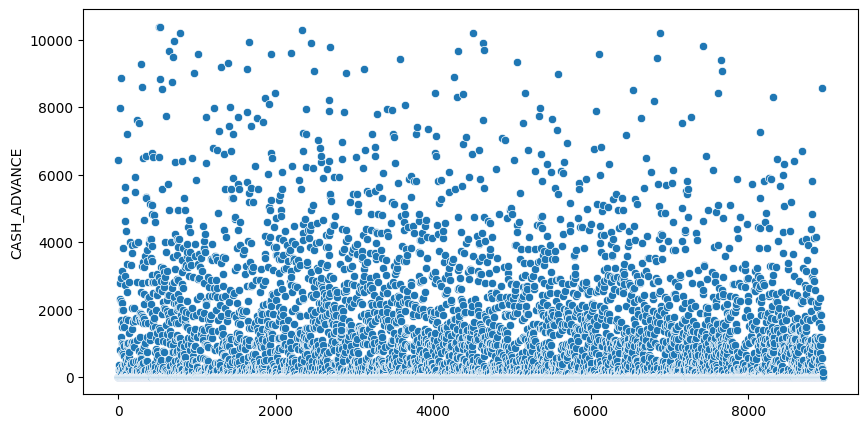

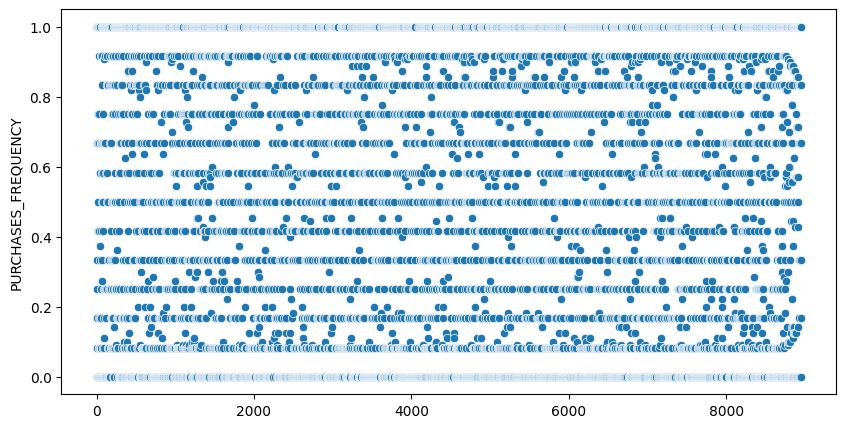

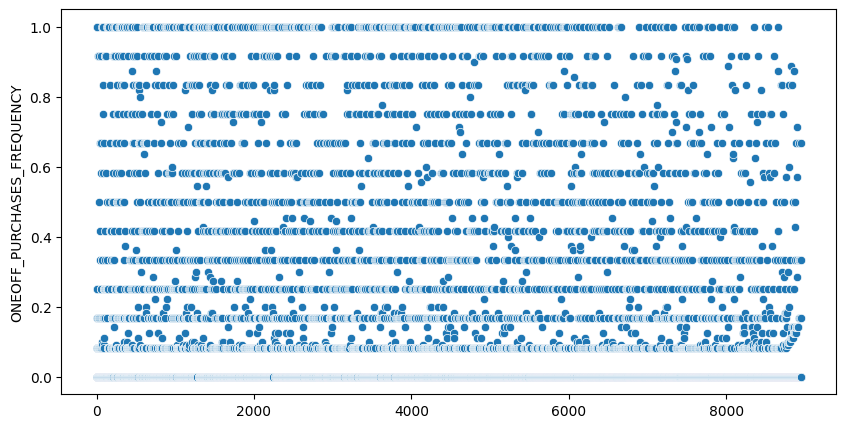

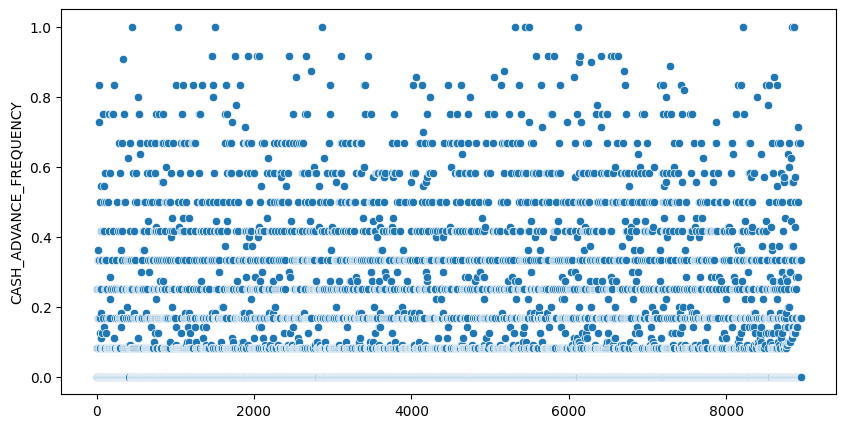

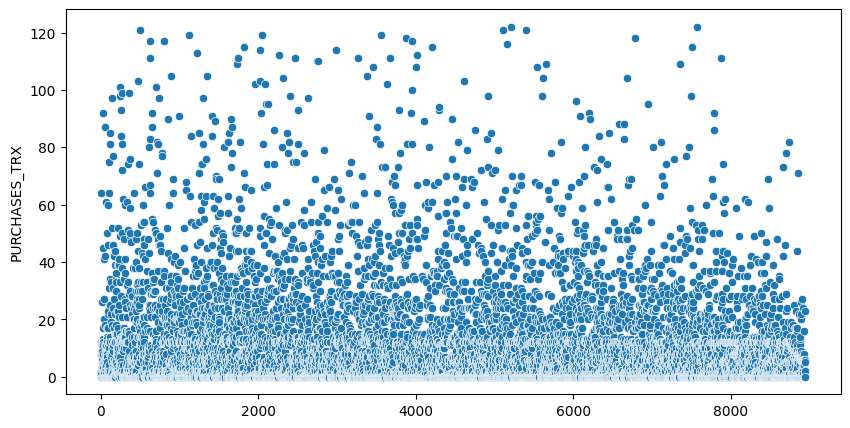

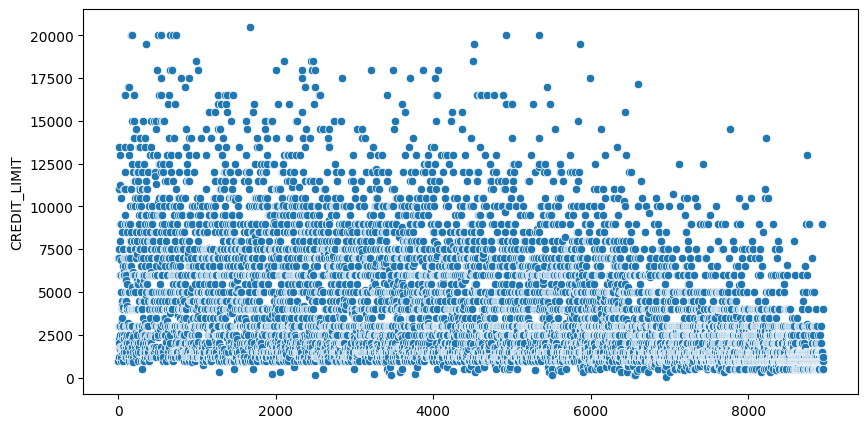

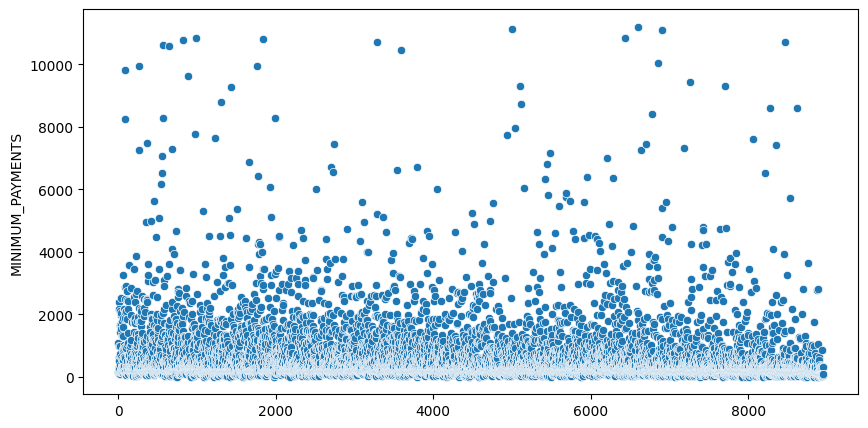

In [1704]:
for column in Num_column:
    plt.figure(figsize=(10,5))
    sns.scatterplot(df[column])
    plt.show()

<Axes: xlabel='TENURE', ylabel='Count'>

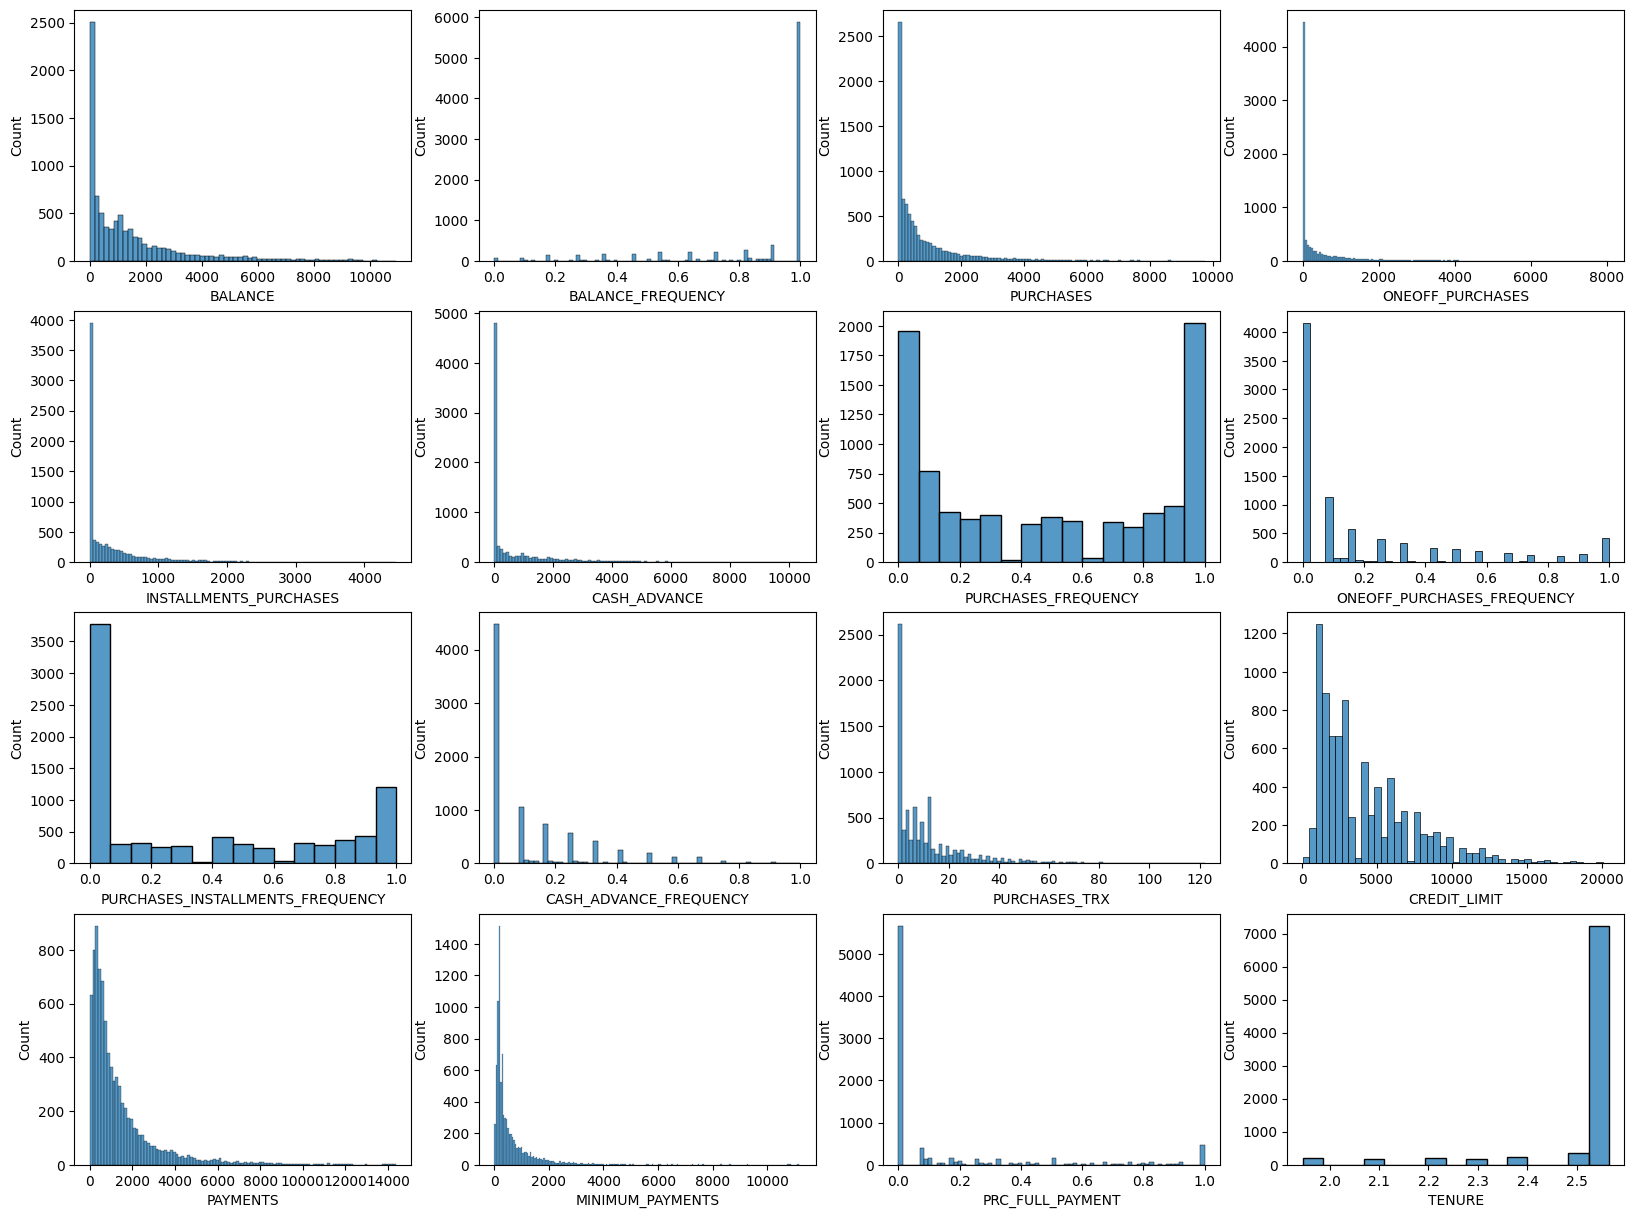

In [1705]:
fig, axs=plt.subplots(4,4, figsize=(20,15))
sns.histplot(df['BALANCE'], ax=axs[0][0])
sns.histplot(df['BALANCE_FREQUENCY'], ax=axs[0][1])
sns.histplot(df['PURCHASES'], ax=axs[0][2])
sns.histplot(df['ONEOFF_PURCHASES'], ax=axs[0][3])
sns.histplot(df['INSTALLMENTS_PURCHASES'], ax=axs[1][0])
sns.histplot(df['CASH_ADVANCE'], ax=axs[1][1])
sns.histplot(df['PURCHASES_FREQUENCY'],ax=axs[1][2])
sns.histplot(df['ONEOFF_PURCHASES_FREQUENCY'], ax=axs[1][3])
sns.histplot(df['PURCHASES_INSTALLMENTS_FREQUENCY'], ax=axs[2][0])
sns.histplot(df['CASH_ADVANCE_FREQUENCY'], ax=axs[2][1])
sns.histplot(df['PURCHASES_TRX'], ax=axs[2][2])
sns.histplot(df['CREDIT_LIMIT'], ax=axs[2][3])
sns.histplot(df['PAYMENTS'], ax=axs[3][0])
sns.histplot(df['MINIMUM_PAYMENTS'], ax=axs[3][1])
sns.histplot(df['PRC_FULL_PAYMENT'], ax=axs[3][2])
sns.histplot(df['TENURE'], ax=axs[3][3])

In [1706]:
from sklearn.preprocessing import StandardScaler


In [1707]:
new_df = df[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']].copy()

In [1708]:
new_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES   
0       40.900749           0.818182      95.40              0.00  \
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY   
0                      95.40      0.000000             0.166667  \
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY   
0                       0.000000                          0.083333  \
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT   
0                   0.000000                 0              2        1000.0  \
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0      201.802084        139.509787          0.000000  2.564949  
1     4103.032597       1072.340217          0.222222  2.564949  
2      622.066742        627.284787          0.000000  2.564949  
3        0.000000        312.452292          0.000000  2.564949  
4      678.334763        244.791237          0.000000  2.564949  
...           ...               ...               ...       ...  
8945   325.594462         48.886365          0.500000  1.945910  
8946   275.861322        312.452292          0.000000  1.9

In [1709]:
scaler = StandardScaler()
scaled_data= scaler.fit_transform(new_df)


In [1710]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_2= pca.fit_transform(scaled_data)

In [1711]:
df_2

array([[-1.53172022, -1.71644322],
       [-2.03498052,  2.89621324],
       [ 1.19328389,  0.10532964],
       ...,
       [-0.58075421, -2.25324277],
       [-2.3493583 , -1.5591324 ],
       [-0.17082713, -0.59660174]])

In [1712]:
k = 3
kmeans= KMeans(n_clusters=k, random_state=0)
kmeans.fit(df_2) 

/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [1766]:
inertia = []
silhouette_avg = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_2)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    if i>1:
        silhouette_avg = silhouette_avg + [silhouette_score(df_2, labels)]

# Silhouette Score

plt.plot(range(1, 15), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


plt.plot(range(2, 15), silhouette_avg)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()



/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expl

import matplotlib.pyplot as plt
# Create a bar plot for segment-wise averages for each variable
for variable in segment_averages.columns:
    plt.figure(figsize=(8, 4))
    segment_averages[variable].plot(kind='bar')
    plt.xlabel('Cluster')
    plt.ylabel('Segment Average')
    plt.title(f'Segment-Wise Averages for Variable: {variable}')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

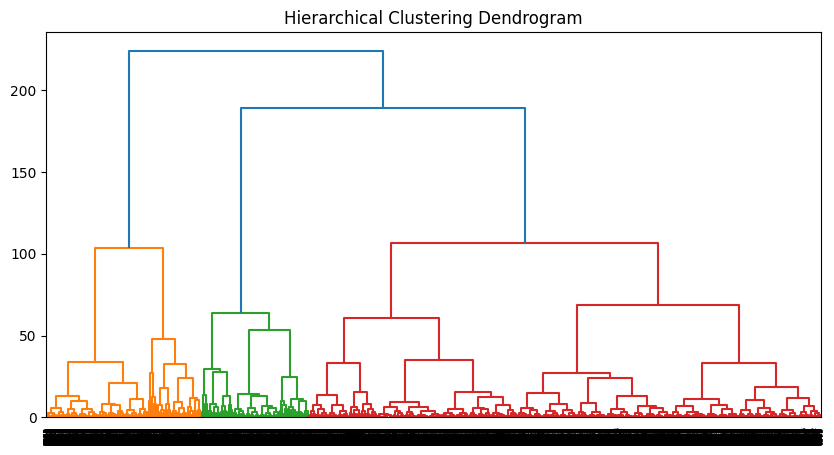

In [1721]:
# Importing required libraries
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate linkage matrix
Z = linkage(df_2, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [1753]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score

Z = linkage(df_2, method='ward')

num_clusters = 3
cluster_labels = fcluster(Z, num_clusters, criterion='distance')

# Silhouette score
silhouette_avg = silhouette_score(df_2, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.28350787089118934


/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Affinity Propagation Silhouette Score: 0.12019360854204772


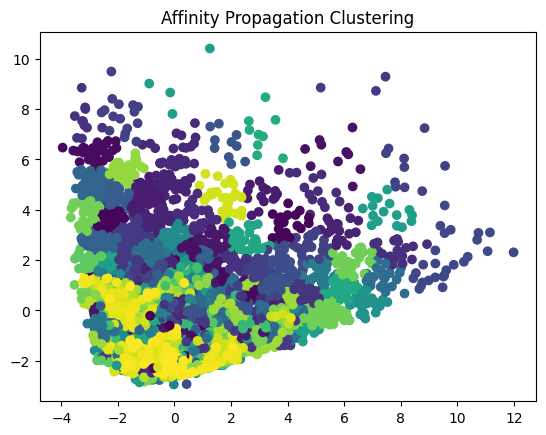

In [1724]:
# Importing required library
from sklearn.cluster import AffinityPropagation

# Applying Affinity Propagation
af = AffinityPropagation(random_state=0)
af_labels = af.fit_predict(df_2)

# Silhouette Score
af_sil_score = silhouette_score(df_2, af_labels)
print(f"Affinity Propagation Silhouette Score: {af_sil_score}")

# Plotting
plt.scatter(df_2[:, 0], df_2[:, 1], c=af_labels)
plt.title('Affinity Propagation Clustering')
plt.show()

In [1725]:
# Importing required library
from sklearn.cluster import DBSCAN

# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_2)

# Silhouette Score
# Note: DBSCAN can result in noise data point with label -1
# Only include points that are part of a cluster
if len(set(dbscan_labels)) > 1:
    dbscan_sil_score = silhouette_score(df_2, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_sil_score}")

# Plotting
plt.scatter(df_2[:, 0], df_2[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.show()

DBSCAN Silhouette Score: 0.4844048216132922


**Customer Profiling Based on K-Means**

In [1726]:
new_df['cluster'] = kmeans.fit_predict(df_2)
segment_counts = new_df['cluster'].value_counts()

/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [1729]:
segment_counts

cluster
0    5167
1    1853
2    1546
Name: count, dtype: int64

In [1728]:
overall_average = new_df.mean()  # Overall average for all variables
segment_averages = new_df.groupby('cluster').mean()  # Segment-wise averages

In [1730]:
segment_averages


BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES   
cluster                                                                  
0         648.443767           0.814825   423.469164        212.519781  \
1        3291.108902           0.954364   271.150955        180.137804   
2        1705.205790           0.975895  2815.778228       1716.711087   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY   
cluster                                                              
0                    211.310656    243.028132             0.456472  \
1                     91.068019   2825.459661             0.200000   
2                   1099.129405    398.605849             0.928268   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY   
cluster                                                                 
0                          0.122655                          0.336256  \
1                          0.094237                          0.117417   
2                          0.561545                          0.725649   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX   
cluster                                                            
0                      0.056265          0.945229       7.718405  \
1                      0.379777          9.141932       4.173233   
2                      0.062074          1.338292      40.512937   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   
cluster                                                                  
0         3099.017825   763.520014        369.337939          0.163900  \
1         5638.516574  2108.115599       1318.804990          0.028155   
2         6468.196519  2758.150989        797.217589          0.264693   

           TENURE  
cluster            
0        2.511866  
1        2.509396  
2        2.554745

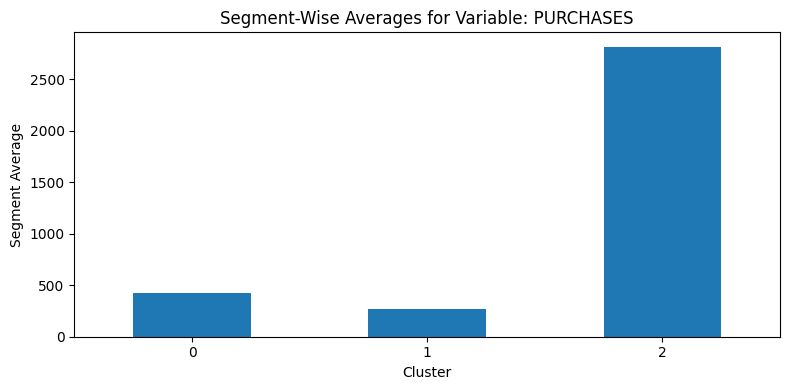

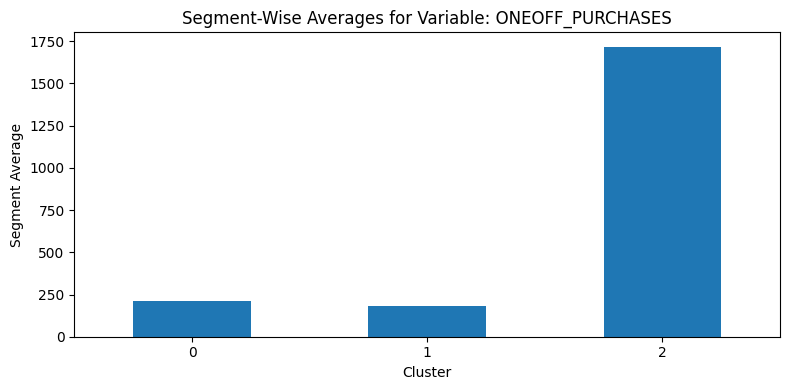

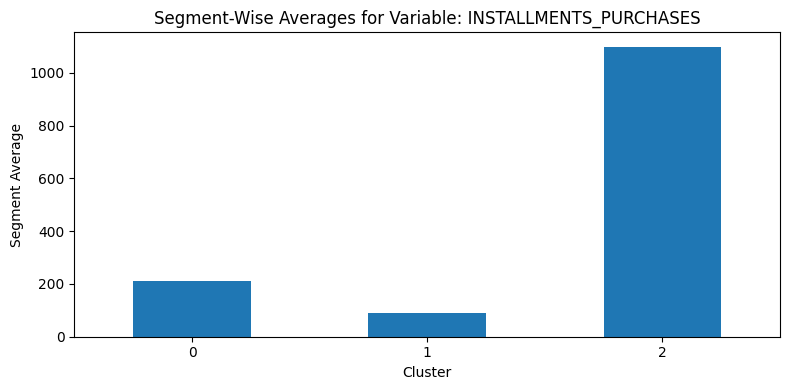

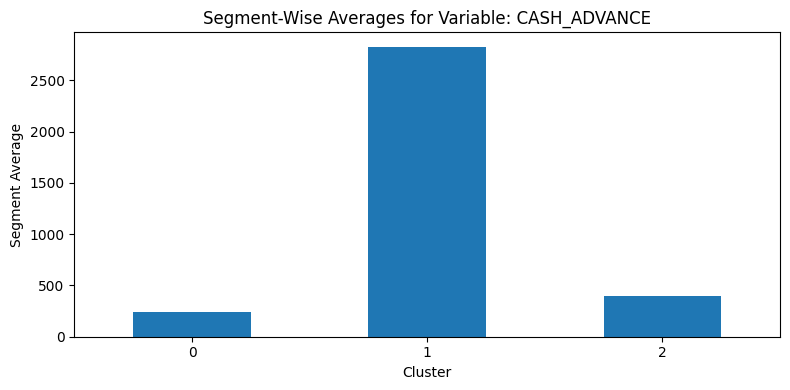

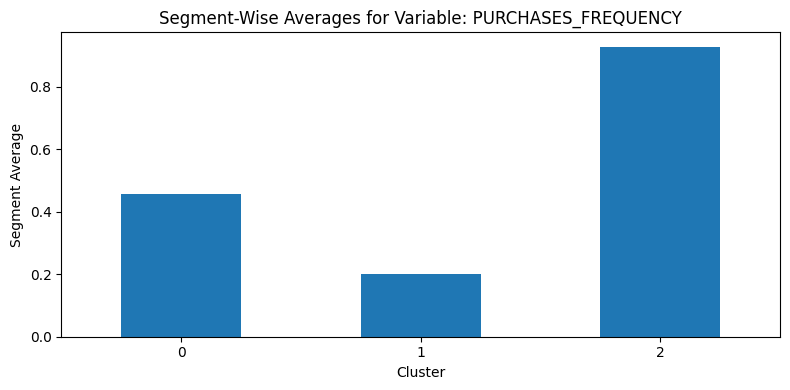

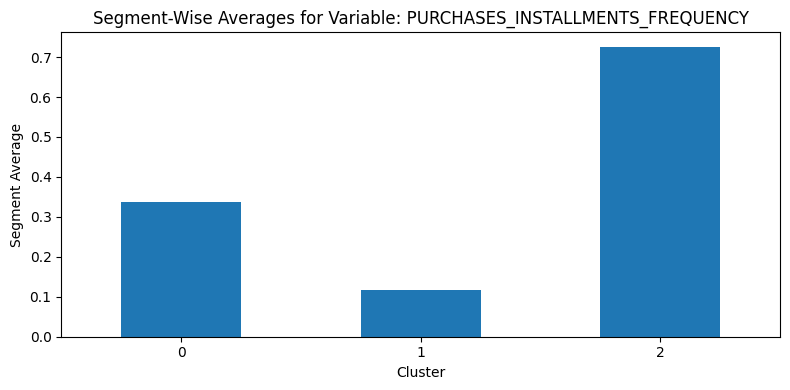

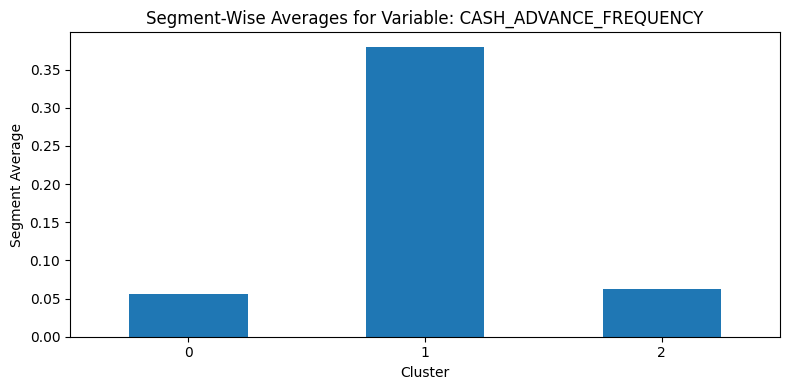

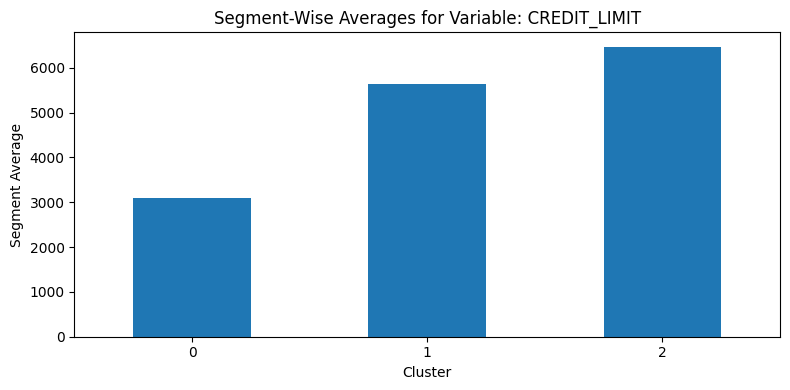

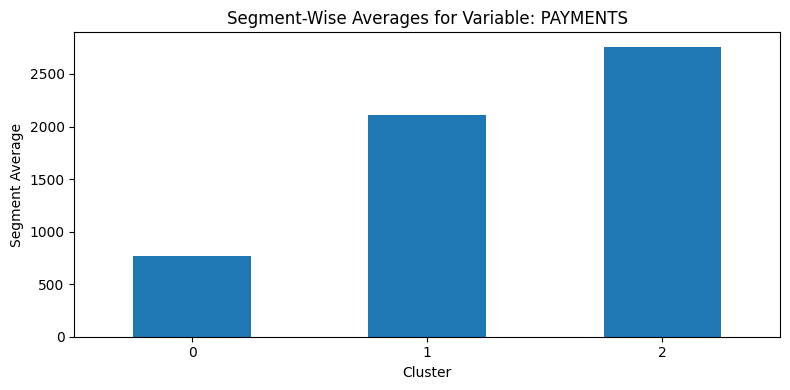

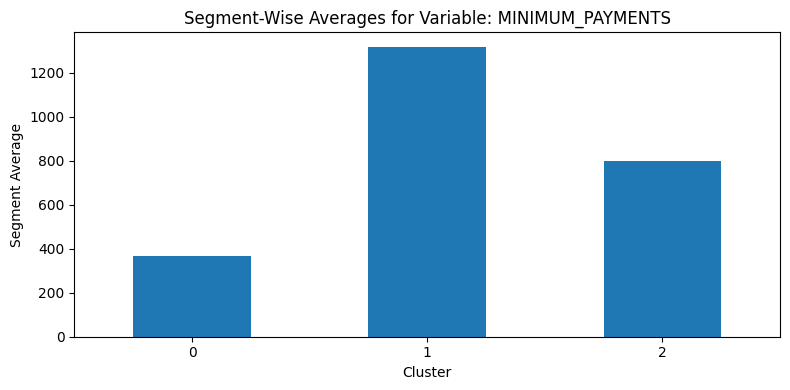

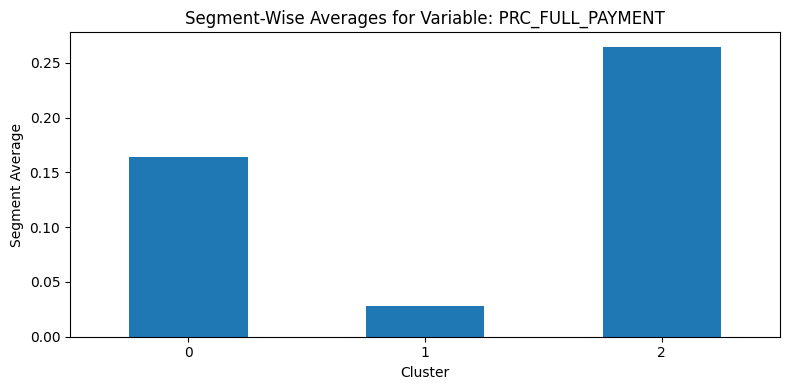

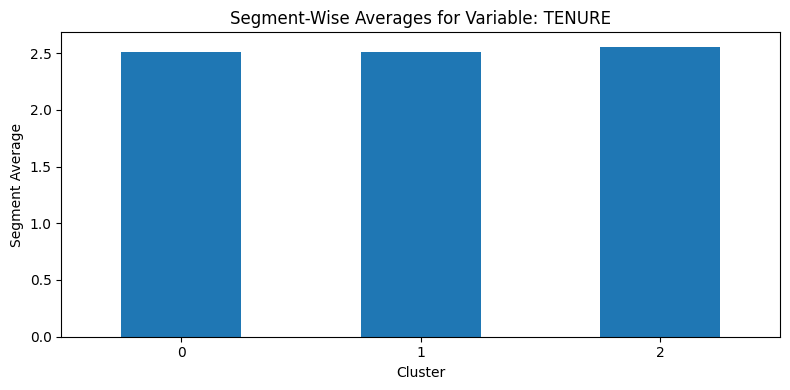

In [1733]:
import matplotlib.pyplot as plt
# Create a bar plot for segment-wise averages for each variable
for variable in segment_averages.columns:
    plt.figure(figsize=(8, 4))
    segment_averages[variable].plot(kind='bar')
    plt.xlabel('Cluster')
    plt.ylabel('Segment Average')
    plt.title(f'Segment-Wise Averages for Variable: {variable}')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [1755]:
segment_averages

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES   
cluster                                                                  
0         648.443767           0.814825   423.469164        212.519781  \
1        3291.108902           0.954364   271.150955        180.137804   
2        1705.205790           0.975895  2815.778228       1716.711087   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY   
cluster                                                              
0                    211.310656    243.028132             0.456472  \
1                     91.068019   2825.459661             0.200000   
2                   1099.129405    398.605849             0.928268   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY   
cluster                                                                 
0                          0.122655                          0.336256  \
1                          0.094237                          0.117417   
2                          0.561545                          0.725649   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX   
cluster                                                            
0                      0.056265          0.945229       7.718405  \
1                      0.379777          9.141932       4.173233   
2                      0.062074          1.338292      40.512937   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   
cluster                                                                  
0         3099.017825   763.520014        369.337939          0.163900  \
1         5638.516574  2108.115599       1318.804990          0.028155   
2         6468.196519  2758.150989        797.217589          0.264693   

           TENURE  
cluster            
0        2.511866  
1        2.509396  
2        2.554745

In [1764]:
cust_profile = {
    0: "High purchaser with high purchase frequency",
    1: "Low One off purchasers with low one off purchase frequency",
    2: "Meduim installment purchasers with meduim purchase installment frequency"
}


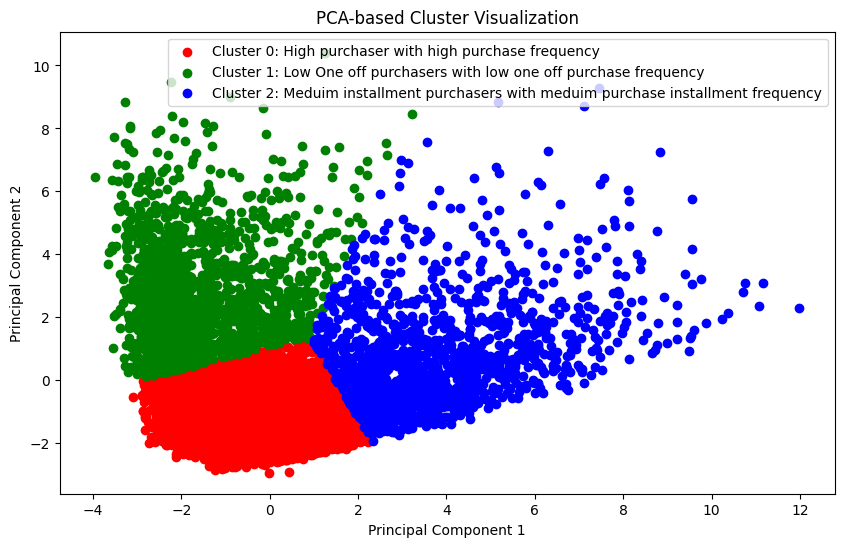

In [1765]:
import matplotlib.pyplot as plt

cluster_labels = range(len(cust_profile))
colors = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
for cluster_label, color in zip(cluster_labels, colors):
    cluster_data = df_2[new_df['cluster'] == cluster_label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=color, label=f'Cluster {cluster_label}: {cust_profile[cluster_label]}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA-based Cluster Visualization')
plt.legend()
plt.show()

**1. Data Preprocessing**

- Data cleaning: We initially checked the dataset to identify if there were any missing values. After identifying the missing values, we moved on to applying the describe function to quickly get insights into the distribution and characteristics of our data. 
- Once we had a good understanding of our data, we initiated the process of replacing the missing values and dropping them. We dropped the one missing value of Credit_Limit and visualized the MINIMUM_PAYMENTS to check if we should consider replacing the missing values with mean or median. We decided to replace it with a median value so that we do not create a bias in the data.
- Once we replaced the missing values, we moved to dropping outliers. We used the Z-score to drop the outliers and plotted a box plot visual to have a better understanding of the outliers. 


**2. Exploratory Data Analysis (EDA)**
- We initiated the EDA process by making boxplots of all the continuous variables to compare the distribution of variables within our dataset, and Boxplot also helped us to have a concise summary of the data's essential statistical characteristics in a single visual representation.
- We then made scatter plots to identify any patterns between variables and also see if there was any relationship between any variables.
- We then made histogram plots to see if the data was skewed to the right (positively skewed), skewed to the left (negatively skewed), or normally distributed. We identified that the majority of the variables were positively skewed, but Tenure was negatively skewed.
- We created a correlation matrix and found out that Balance has a higher level of correlation with Cash Advance, Cash Advance Frequency, and Credit Limit. Payments variable has a high correlation with Purchases and one-off Purchases. In contrast, Tenure has a negative correlation with Cash Advance and Cash Advance Frequency variables.
- We then made a new data frame to store all the variables except for the Cust_id to start our further analysis of clustering the data using different clustering techniques. 
- We then moved on to scaling the numerical data to ensure that the data is in a consistent format that allows machine learning algorithms to work effectively and efficiently and produce more reliable results.
- Given the complexity of our dataset, we decided to simplify it by using Principal Component Analysis (PCA). With just two components, we reduced the data's dimensionality while retaining the most critical information. This made our subsequent analysis more manageable.


**3. Clustering Algorithms**
For our clustering methods, we chose to go with (K-Means, Hierarchical clustering Dendogram, and DBSCAN). Each of these models has its own advantages and disadvantages.
- We initiated the clustering by using the Elbow method to determine the optimal number of clusters (k), and we also considered the Silhouette Score.
- We identified that the Elbow method bend is sharp at n_cluster = 3

1. K-Means: 
- We initiated the K-Means clustering and set the number of centroids to 3 as we got it from the Elbow method.
- The clusters formed using K-means were distinct.
- The Silhouette score of K-Means came to be 43.65. We did not want to emphasize too much on increasing the Silhouette score as there is a chance of overfitting and forcing the model to cluster non-similar data points into one cluster.
- The advantage of K-Means for this data was that it was able to identify three distinct clusters to give us a broad understanding of our customers. K-means helps in segmenting customers into distinct groups by finding patterns or similarities in their behavior, preferences, or attributes.

2. Hierarchical clustering Dendogram:
- As for our Hierarchical clustering, since the data we have is noisy, we used the linkage method as "ward." This is the best method to approach noisy data.
- We had three dendrograms formed, and the Silhouette score came to be ~ 0.28, which suggests that, on average, the data points in our clusters have a moderate degree of separation from neighboring clusters. This indicates that some data points are well-clustered, while others may be closer to the boundaries between clusters, which can suggest that there may be some overlap or ambiguity in the clustering. As for business also, it can be computationally more expensive, especially for large datasets.
- This method was harder to choose for customer segmentation as the hierarchical nature of clustering makes it challenging to interpret the results and define distinct customer segments.

3. DBSCAN: 
- We initiated the DBSCAN method by setting parameters such as epi=0.5, which is the maximum distance between two samples for one to be considered as in the neighborhood of the other.
- We did not set the number of clusters as the method does not require the users to set it. 
- And the min_samples=5: This parameter specifies the minimum number of data points within the radius (eps) for a point to be considered a core point and for a cluster to be formed around it.
- For this method, although we got a high Silhouette score, the problem with this was that visually, the clusters were not looking very clear.


**Final Model Selection:**
- After experimenting with different clustering model methods for the data, and in the end, I decided to go for the K-Means model. I made this choice because the data doesn't have many small, distinct groups; instead, the data points are quite alike. Because of this similarity, I decided not to use density-based algorithms, which work best when data points form tight clusters. K-Means seemed like a better fit for my situation. 


**4.Interpreting Clusters**
- Once we had our clustering method selected, we proceeded with making customer profiles. In order to do so, I took the following steps.
- 1. We used the fit_predict method from the K-Means model (k-Means) to assign cluster labels to the data in df_2. The resulting cluster labels are stored in a new column called 'cluster.'
- 2. Then, we did a count function to count all the data points in each cluster that are already made in the above.
- 3. Then, I calculated the overall average for all the variables in the dataset using overall_average = new_df.mean(). This gave me a single value for each variable, representing the average across the entire dataset.
- 4. Then, I wanted to see how these averages vary within different segments of the data. So, I used segment_averages = new_df.groupby('cluster').mean() to calculate segment-wise averages. This grouped the data by clusters, and for each cluster, I obtained the average value for each variable. It's a great way to understand how the variables differ between different groups or segments in my dataset.
- 5. We plotted segment-wise averages for each variable in order to see how data points are distributed in different clusters.

**Making customer Profiling**
- 1. We initiated by making three customer profiles based on the segment average we got before. Each of these profiles stores a different category of customer, which we can target differently. 
- 2. Once we had made these profiles, we then made a scatter plot. The scatter plot had the three customer profiles we made. 
- 3. The clusters are distinct in nature, with different colors separating them.

**Actionable Insights**
- 1. In order for the business to target the customers that fall under  0: "High purchaser with high purchase frequency" cluster, they can adopt the following approaches.
- -----1.1 Provide Customized Reward Program: Initiate a reward program for high spenders with high purchase frequency, rewards such as travel rewards or exclusive discounts at partner retailers.
- -----1.2 Low or No Annual Fees: Since these are the customers that have higher transactional frequency and any other credit card company would want to pouch such clients, by not charging them any annual fee, we can increase customer retention as this will increase the customer satisfaction.
- -----1.3 Offer higher credit limits: By offering them higher credit limits not only accommodates their spending needs but also incentivizes them to use your credit card for a wider range of transactions.
- -----1.4 No Foreign Transaction Fees: By offering no foreign transaction fee, we will be encouraging these customers who are big spenders to use their credit cards while they are traveling outside the country. This will bring the credit card company a competitive advantage as many credit cards do not offer such benefits. This will increase customer satisfaction and, ultimately, retention. 

- 2. Customers who fall into 1: "Low One off purchasers with low one-off purchase frequency" should be targeted using the following approaches:
- -----2.1 Basic Rewards: Instead of offering complex rewards programs, the credit card company can provide basic rewards, such as cashback on everyday purchases like groceries and gas. These rewards can encourage occasional card usage.
- -----2.2 Low Credit Limits: Since these customers are occasional users, by providing them with lower credit limits, we can help prevent cardholders from overspending or accumulating unmanageable debt. This promotes the responsible use of the credit card and also helps users to build credit scores.
- -----2.3 Flexible Payment Options: Since these customers are usually not big spenders, the credit card company can offer them better payment plans, such as providing low-interest rates for customers who carry a balance. This can be an attractive feature for those who make occasional large purchases.

- 3. Customers who fall into this 2: "Medium installment purchasers with medium purchase installment frequency" should be targeted using the following approach.
- -----3.1 Tiered Rewards: By Implementing tiered rewards that increase with spending, we can encourage medium installment purchasers to use their credit cards more frequently and for higher-value purchases. This approach involves creating multiple tiers with increasing benefits based on spending levels. 
- -----3.2 Customized Rewards Programs: Credit card companies can design rewards and cashback programs that cater to medium spenders. By Offering cashback on a range of everyday expenses, including dining, entertainment, and shopping, which align with their spending habits, we can make the customer feel that we are catering to their needs.
- -----3.3 Special Merchant Partnerships: The credit card company can Partner with specific retailers or service providers that are frequently used by this segment, offering discounts, bonuses, or exclusive offers with those partners. 


Additional Inputs that can be used:
- 1. Offer Customized investment opportunities for all these three customer segments. This will ensure that the customers stick with the bank. Investment opportunities that the customers are usually not aware of, such as RRSP, this is a tax-deductible investment that can be used by the customers through the bank. 


